In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Grad_data.csv")
df.head()

,gid,src_state,source_url,observationuri,temp_c,temp_type,depth_m,depth_type,well_name,name_src,lat_wgs84,lon_wgs84,state,county,grad
0,1,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,142,measured,4193.4384,driller total,4242732762,apino,26.98900,-99.16300,TX,Zapata,30.285410
1,2,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,68,measured,2405.4816,measured,4.20E+13,apino,32.75492,-101.29642,TX,Borden,22.033010
2,3,TX,http://services.azgs.az.gov/ArcGIS/services/aa...,http://resources.usgin.org/uri-gin/tbeg/bhtemp...,147,measured,3489.0456,driller total,4250533301,apino,26.98900,-99.16300,TX,Zapata,37.832696
3,6,AL,http://kgs.uky.edu/arcgis/services/aasggeother...,http://resources.usgin.org/uri-gin/algs/bhtemp...,33,measured,858.0120,driller total,1.13E+12,apino,33.26590,-87.33860,AL,Tuscaloosa,20.978728
4,9,AL,http://kgs.uky.edu/arcgis/services/aasggeother...,http://resources.usgin.org/uri-gin/algs/bhtemp...,42,measured,1387.7544,driller total,1.13E+12,apino,33.47197,-87.38047,AL,Tuscaloosa,19.455892


In [4]:
drop_cols = ['gid', 'src_state', 'source_url', 'observationuri', 'temp_type','depth_type', 'well_name', 'name_src', 'county','state','temp_c']
new_data = df.drop(drop_cols, axis =1)
new_data.head()

,depth_m,lat_wgs84,lon_wgs84,grad
0,4193.4384,26.98900,-99.16300,30.285410
1,2405.4816,32.75492,-101.29642,22.033010
2,3489.0456,26.98900,-99.16300,37.832696
3,858.0120,33.26590,-87.33860,20.978728
4,1387.7544,33.47197,-87.38047,19.455892


In [5]:
new_data.describe()

,depth_m,lat_wgs84,lon_wgs84,grad
count,12028.000000,12028.000000,12028.000000,12028.000000
mean,1913.076879,37.283332,-102.392728,28.056998
std,1068.270799,6.066705,12.207062,6.002044
min,71.000000,26.989000,-163.915590,17.004353
25%,1017.422400,33.392888,-108.460662,22.792784
50%,1787.956800,37.100389,-107.736194,27.950388
75%,2502.408000,39.684826,-88.010225,32.870226
max,6601.968000,71.282020,-85.177358,39.998489


In [6]:
col = ['grad']
X = new_data.drop(col, axis=1)
target = 'temp_c'
y = new_data['grad']
X

,depth_m,lat_wgs84,lon_wgs84
0,4193.4384,26.989000,-99.163000
1,2405.4816,32.754920,-101.296420
2,3489.0456,26.989000,-99.163000
3,858.0120,33.265900,-87.338600
4,1387.7544,33.471970,-87.380470
...,...,...,...
12023,2150.6688,39.503237,-108.136174
12024,2161.3368,39.503149,-108.136062
12025,2289.9624,39.501411,-107.938385
12026,2490.8256,39.501367,-107.938334


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

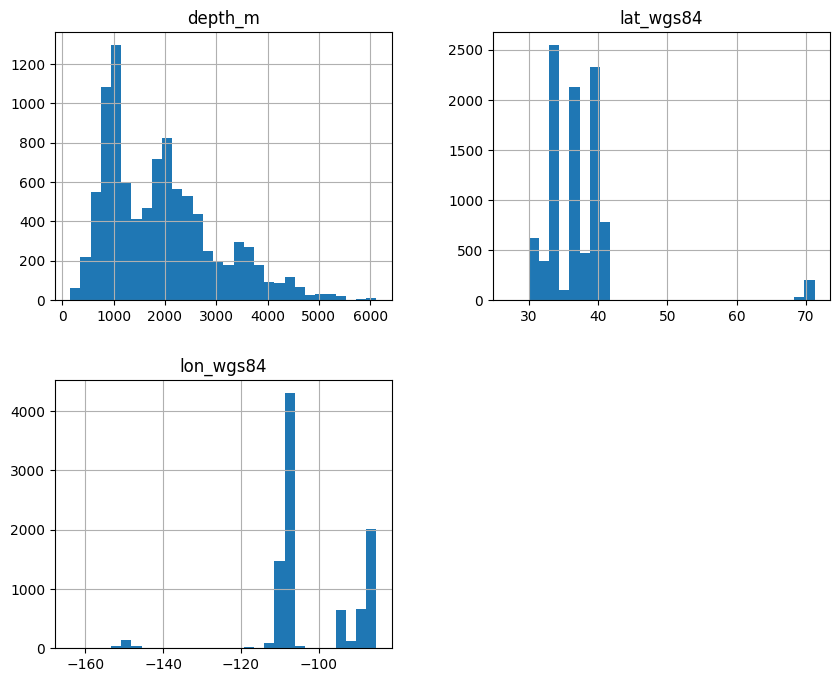

In [8]:
X_train.hist(bins=30, figsize =(10,8))
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(512,256,128,64),
    activation='relu',
    solver='sgd',
    learning_rate='adaptive',
    batch_size=64,
    learning_rate_init=0.0001,
    max_iter=2000,
    random_state=101,
    validation_fraction= 0.2

)

In [12]:
model = mlp_regressor.fit(X_train_s, y_train)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
preds = mlp_regressor.predict(X_test_s)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test,preds)
mae

3.106917008784699

In [14]:
mape = mean_absolute_percentage_error(y_test,preds)
mape

0.1174209462389051

In [15]:
r2_score (y_test,preds)

0.5315446911153957

In [16]:
X_test['grad'] = preds
combined = X_test
combined

,depth_m,lat_wgs84,lon_wgs84,grad
4412,3246.1200,33.027070,-93.237610,30.419394
11908,2214.3720,39.479950,-108.132779,33.723905
5032,609.6000,33.954180,-113.123866,31.923751
2611,775.7160,33.756720,-87.561160,27.419162
1562,1162.8120,33.190720,-87.696030,23.452956
...,...,...,...,...
3573,3317.1384,31.394656,-86.737117,20.909624
3206,1554.4800,32.995510,-87.576850,22.089798
5718,763.8288,37.254212,-107.790400,30.207241
11123,2535.6312,40.882451,-108.298186,21.553658


In [17]:
import folium
from folium.plugins import HeatMap

# Sample data (replace this with your own data)

# Create a base map
m = folium.Map(location=[combined['lat_wgs84'].mean(), combined['lon_wgs84'].mean()], zoom_start=15)

# Create a HeatMap layer
heat_data = [[point['lat_wgs84'], point['lon_wgs84'], point['grad']] for _, point in combined.iterrows()]
HeatMap(heat_data, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}, radius=15, blur=20).add_to(m)

legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 150px;
                 background-color: rgba(255, 255, 255, 0.5);
                 border-radius: 5px;
                 z-index:1000;
                 padding: 10px;
                 ">
     <p><strong>Temperature Legend in Celsius</strong></p>
     <p><span style="background-color: blue; opacity: 0.4; padding: 5px; border-radius: 3px;"></span> 0-24</p>
     <p><span style="background-color: lime; opacity: 0.65; padding: 5px; border-radius: 3px;"></span> 29-30</p>
     <p><span style="background-color: red; opacity: 1; padding: 5px; border-radius: 3px;"></span> 30+</p>
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("temperature_heatmap.html")


In [21]:
import folium
import pandas as pd



def get_color(grad):
    if grad >= 30:
        return 'red'
    elif grad >= 25:
        return 'yellow'
    else:
        return 'green'


k = folium.Map(location=[combined['lat_wgs84'].mean(), combined['lon_wgs84'].mean()], zoom_start=6)

for index, row in new_data.iterrows():
    color = get_color(row['grad'])
    folium.CircleMarker(
        location=[row['lat_wgs84'], row['lon_wgs84']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'grad: {row["grad"]:.2f}',
    ).add_to(k)
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 150px;
                 background-color: rgba(255, 255, 255, 0.5);
                 border-radius: 5px;
                 z-index:1000;
                 padding: 10px;
                 ">
     <p><strong>Temperature Gradient Legend in Celsius</strong></p>
     <p><span style="background-color: green; opacity: 0.4; padding: 5px; border-radius: 3px;"></span> 0-24</p>
     <p><span style="background-color: yellow; opacity: 0.65; padding: 5px; border-radius: 3px;"></span> 25-30</p>
     <p><span style="background-color: red; opacity: 1; padding: 5px; border-radius: 3px;"></span> 30+</p>
     </div>
     '''

k.get_root().html.add_child(folium.Element(legend_html))


k.save('concentration_map.html')

In [22]:
k

Output hidden; open in https://colab.research.google.com to view.

In [23]:
X_test['temp_c'] = y_test
combined_1 = X_test
combined_1

,depth_m,lat_wgs84,lon_wgs84,grad,temp_c
4412,3246.1200,33.027070,-93.237610,30.419394,33.270489
11908,2214.3720,39.479950,-108.132779,33.723905,37.030815
5032,609.6000,33.954180,-113.123866,31.923751,27.887139
2611,775.7160,33.756720,-87.561160,27.419162,28.360895
1562,1162.8120,33.190720,-87.696030,23.452956,24.939543
...,...,...,...,...,...
3573,3317.1384,31.394656,-86.737117,20.909624,19.896668
3206,1554.4800,32.995510,-87.576850,22.089798,21.872266
5718,763.8288,37.254212,-107.790400,30.207241,36.657429
11123,2535.6312,40.882451,-108.298186,21.553658,20.113335


In [24]:
import folium
import pandas as pd



def get_color(grad):
    if grad >= 30:
        return 'red'
    elif grad >= 25:
        return 'yellow'
    else:
        return 'green'


g = folium.Map(location=[combined_1['lat_wgs84'].mean(), combined_1['lon_wgs84'].mean()], zoom_start=6)

for index, row in new_data.iterrows():
    color = get_color(row['grad'])
    folium.CircleMarker(
        location=[row['lat_wgs84'], row['lon_wgs84']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f'grad: {row["grad"]:.2f}',
    ).add_to(g)
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 150px;
                 background-color: rgba(255, 255, 255, 0.5);
                 border-radius: 5px;
                 z-index:1000;
                 padding: 10px;
                 ">
     <p><strong>Temperature Gradient Legend in Celsius</strong></p>
     <p><span style="background-color: green; opacity: 0.4; padding: 5px; border-radius: 3px;"></span> 0-24</p>
     <p><span style="background-color: yellow; opacity: 0.65; padding: 5px; border-radius: 3px;"></span> 25-30</p>
     <p><span style="background-color: red; opacity: 1; padding: 5px; border-radius: 3px;"></span> 30+</p>
     </div>
     '''

g.get_root().html.add_child(folium.Element(legend_html))


g.save('concentration_map.html')

In [25]:
g

Output hidden; open in https://colab.research.google.com to view.

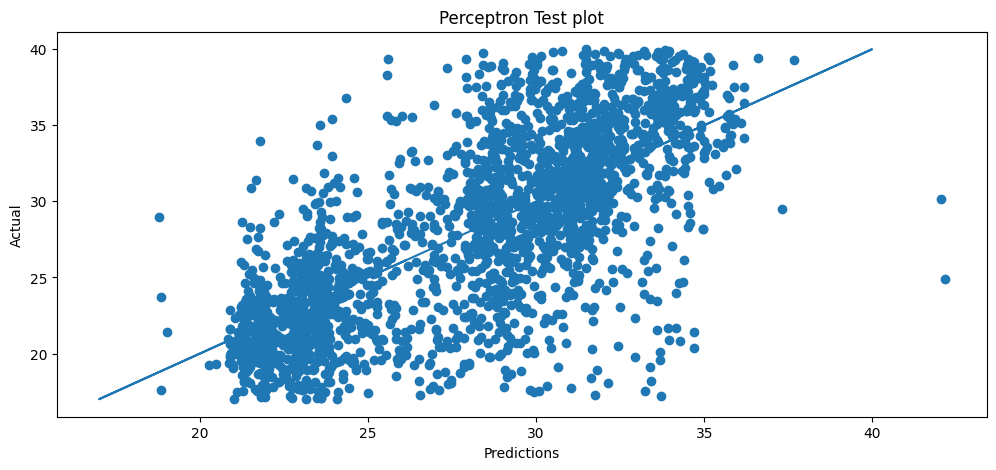

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_test, y_test)
plt.scatter(preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Perceptron Test plot")
plt.savefig("test plot.jpg", bbox_inches="tight")

In [19]:
new_preds = mlp_regressor.predict(X_train_s)
r2_score(y_train,new_preds)

0.5365630708713058

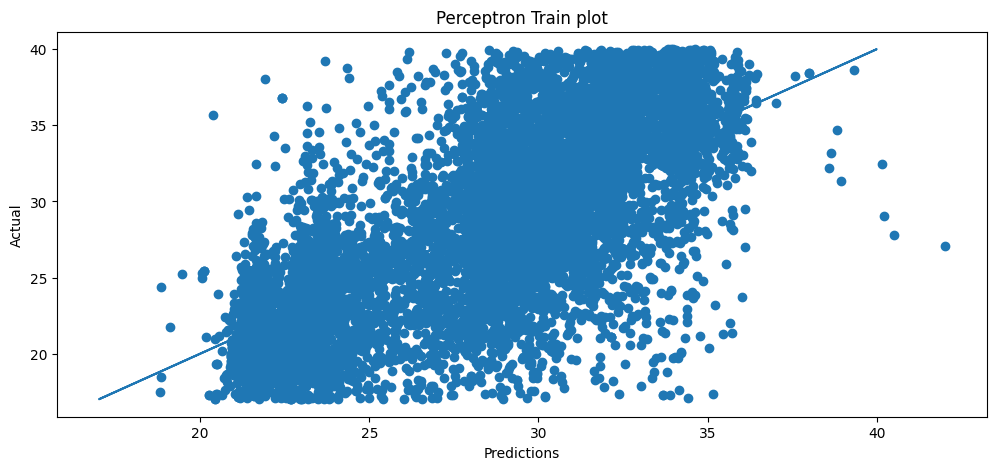

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_train, y_train)
plt.scatter(new_preds, y_train)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Perceptron Train plot")
plt.savefig("test plot.jpg", bbox_inches="tight")

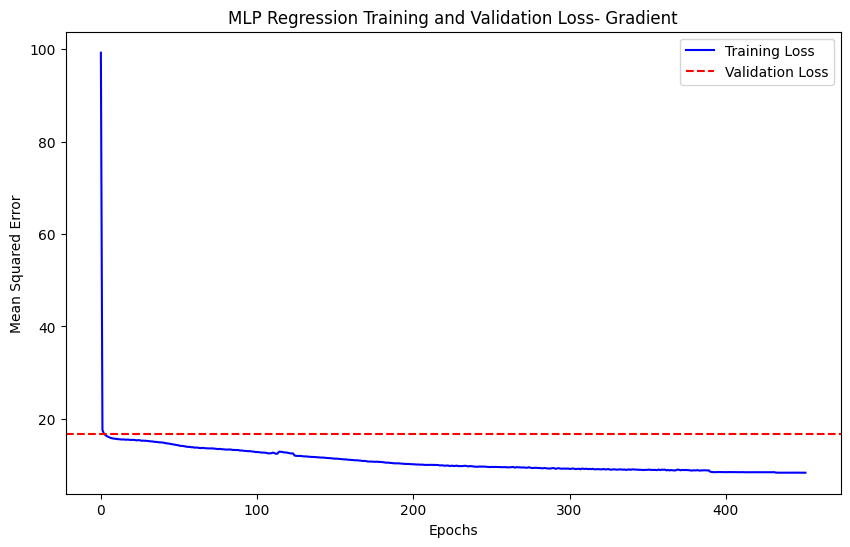

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(mlp_regressor.loss_curve_, label='Training Loss', color='blue')
plt.axhline(y=mse, color='red', linestyle='--', label='Validation Loss')
plt.title('MLP Regression Training and Validation Loss- Gradient')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()